**N Grams**

First lets learn about n-grams

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["I am Going to the Supermarket to buy milk"])
v.vocabulary_

{'am': 0, 'going': 2, 'to': 6, 'the': 5, 'supermarket': 4, 'buy': 1, 'milk': 3}

In [70]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["I am Going to the Supermarket to buy milk"])
v.vocabulary_

{'am': 0,
 'going': 4,
 'to': 11,
 'the': 9,
 'supermarket': 7,
 'buy': 2,
 'milk': 6,
 'am going': 1,
 'going to': 5,
 'to the': 13,
 'the supermarket': 10,
 'supermarket to': 8,
 'to buy': 12,
 'buy milk': 3}

In [71]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["I am Going to the Supermarket to buy milk"])
v.vocabulary_

{'am': 0,
 'going': 5,
 'to': 15,
 'the': 12,
 'supermarket': 9,
 'buy': 3,
 'milk': 8,
 'am going': 1,
 'going to': 6,
 'to the': 18,
 'the supermarket': 13,
 'supermarket to': 10,
 'to buy': 16,
 'buy milk': 4,
 'am going to': 2,
 'going to the': 7,
 'to the supermarket': 19,
 'the supermarket to': 14,
 'supermarket to buy': 11,
 'to buy milk': 17}

In [72]:
import spacy
nlp = spacy.load("en_core_web_sm")


def preprocess(text):
     doc = nlp(text)
     fil_tokens = []
     for token in doc:
         if not(token.is_stop or token.is_punct):
                 fil_tokens.append(token.lemma_)
     return " ".join(fil_tokens)
                 
processed = [preprocess("I am Going to the Supermarket to buy milk")]                

In [73]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(processed)
v.vocabulary_

{'go': 2,
 'supermarket': 5,
 'buy': 0,
 'milk': 4,
 'go supermarket': 3,
 'supermarket buy': 6,
 'buy milk': 1}

In [74]:
v.transform(["I go to supermarket"]).toarray()

array([[0, 0, 1, 0, 0, 1, 0]], dtype=int64)

In [75]:
v.transform(["I buy milk"]).toarray()

array([[1, 1, 0, 0, 1, 0, 0]], dtype=int64)

**Category Classification problem**

In [120]:
df = pd.read_json("news_dataset.json")
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [121]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [124]:
min_sample = 1381

df_SCIENCE = df[df.category == "SCIENCE"].sample(min_sample, random_state = 2022)
df_BUSINESS = df[df.category == "BUSINESS"].sample(min_sample, random_state = 2022)
df_CRIME= df[df.category == "CRIME"].sample(min_sample, random_state = 2022)
df_SPORTS = df[df.category == "SPORTS"].sample(min_sample, random_state = 2022)

In [125]:
df_balanced = pd.concat([df_SCIENCE,df_BUSINESS,df_CRIME,df_SPORTS])
df_balanced.category.value_counts()

SCIENCE     1381
BUSINESS    1381
CRIME       1381
SPORTS      1381
Name: category, dtype: int64

In [126]:
df_balanced["category_num"] = df_balanced['category'].map({
    "SCIENCE": 0,
    "BUSINESS": 1,
    "CRIME": 2,
     "SPORTS": 3
})

df_balanced.head()

,text,category,category_num
7210,It's Time We Take A Look At How Female Astrono...,SCIENCE,0
12292,Scientists Reveal The Secret Key To Charisma I...,SCIENCE,0
6249,Watch One Of The World's Largest Lakes Shrink ...,SCIENCE,0
379,'Falling Fruit' Map Helps Foragers Find Their ...,SCIENCE,0
12505,When Science Fiction Gets Real Many science fi...,SCIENCE,0


In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size = 0.2,
    random_state=2022,
    stratify=df_balanced.category_num

) 

In [132]:
print(x_train[4769])

Here's Why You Don't Bully A Poker Pro With 27.8 Million Chips In The Pot "You're being abusive to me."


In [133]:
x_train.head()

4769    Here's Why You Don't Bully A Poker Pro With 27...
5724    Our Long National Deflategate Nightmare Is Bac...
1923    Most Men Don't Care About Diversity In The Boa...
1733    Beloved Bipedal Bear Named Pedals Believed Kil...
2526    Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [134]:
y_train.head()

4769    3
5724    3
1923    1
1733    2
2526    2
Name: category_num, dtype: int64

In [135]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vec_box', CountVectorizer(ngram_range=(1,1))),
    ('Multi NB', MultinomialNB())

])

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       276
           1       0.77      0.89      0.83       277
           2       0.87      0.90      0.89       276
           3       0.92      0.83      0.87       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



**Now lets try to use differentngram ranges**

In [136]:
clf = Pipeline([
    ('vec_box', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB', MultinomialNB())

])

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       276
           1       0.70      0.92      0.79       277
           2       0.87      0.88      0.87       276
           3       0.91      0.78      0.84       276

    accuracy                           0.83      1105
   macro avg       0.85      0.83      0.83      1105
weighted avg       0.85      0.83      0.83      1105



In [137]:
clf = Pipeline([
    ('vec_box', CountVectorizer(ngram_range=(1,3))),
    ('Multi NB', MultinomialNB())

])

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       276
           1       0.67      0.92      0.78       277
           2       0.87      0.86      0.86       276
           3       0.92      0.77      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



In [138]:
df_balanced["pre_text"] = df_balanced['text'].apply(preprocess)
df_balanced.head()

,text,category,category_num,pre_text
7210,It's Time We Take A Look At How Female Astrono...,SCIENCE,0,Time look female astronomer treat Hidden figur...
12292,Scientists Reveal The Secret Key To Charisma I...,SCIENCE,0,scientist reveal secret Key Charisma think foo...
6249,Watch One Of The World's Largest Lakes Shrink ...,SCIENCE,0,watch World Largest Lakes Shrink eye go go nea...
379,'Falling Fruit' Map Helps Foragers Find Their ...,SCIENCE,0,fall fruit Map help forager find Free Meal say...
12505,When Science Fiction Gets Real Many science fi...,SCIENCE,0,Science Fiction get real science fiction write...


In [139]:
x_train, x_test, y_train, y_test = train_test_split(
    df_balanced.pre_text,
    df_balanced.category_num,
    test_size = 0.2,
    random_state=2022,
    stratify=df_balanced.category_num

) 

In [140]:
clf = Pipeline([
    ('vec_box', CountVectorizer(ngram_range=(1,1))),
    ('Multi NB', MultinomialNB())

])

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       276
           1       0.84      0.86      0.85       277
           2       0.85      0.92      0.88       276
           3       0.92      0.88      0.90       276

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.87      0.87      0.87      1105



**And we see that the accuracy raised a bit**

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[231,  24,  12,   9],
       [ 16, 237,  13,  11],
       [  5,  15, 254,   2],
       [  6,   7,  20, 243]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

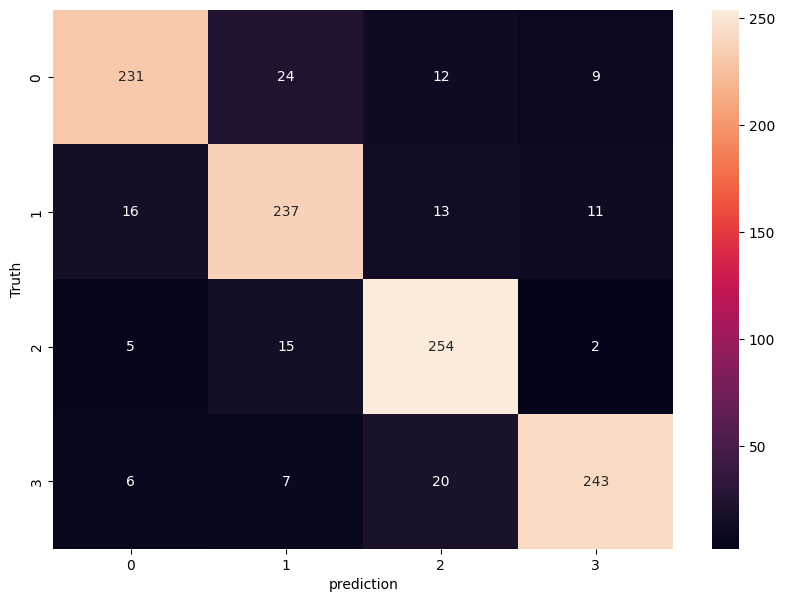

In [142]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel("prediction")
plt.ylabel('Truth')